In [5]:
from server_specific.server_utils import get_patients
import numpy as np
import matplotlib.pyplot as plt
from data_generation.config import mean_voxel_intensity
from data.data_utils import shift_mean

In [6]:
patients = get_patients()
patients = np.array(patients)

amt of detected_files:  1800
amt of patients:  800


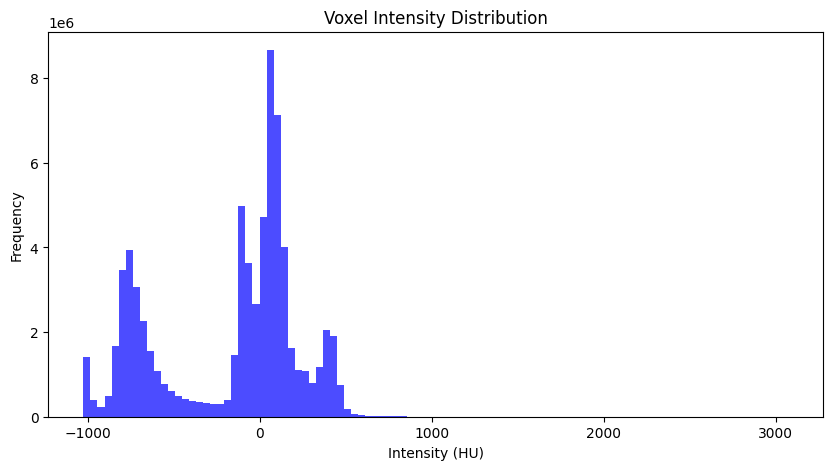

In [7]:
test_ccta_scan, _ = patients[0].get_image_mask_tuple()
flattened_ccta_scan = test_ccta_scan.flatten()

# Plotting the histogram of voxel intensities
plt.figure(figsize=(10, 5))
plt.hist(flattened_ccta_scan, bins=100, color='blue', alpha=0.7)
plt.title("Voxel Intensity Distribution")
plt.xlabel("Intensity (HU)")
plt.ylabel("Frequency")
plt.show()

In [8]:
amt_of_patients = len(patients)

mean_values = []
for patient_idx in range(amt_of_patients):
    print(f"processing patient {patient_idx} / {amt_of_patients}", end="\r")
    test_ccta_scan, _ = patients[patient_idx].get_image_mask_tuple()
    flattened_ccta_scan = test_ccta_scan.flatten()
    
    mean_values.append(flattened_ccta_scan.mean())
    
plt.figure(figsize=(10, 5))
plt.hist(mean_values, bins=100, color='blue', alpha=0.7)
plt.title("Max voxel intensity")
plt.xlabel("Intensity (HU)")
plt.ylabel("Frequency")
plt.show()

KeyboardInterrupt: 

In [23]:
mean_of_means = np.array(mean_values).mean()
print(mean_of_means)

-186.26184501234013


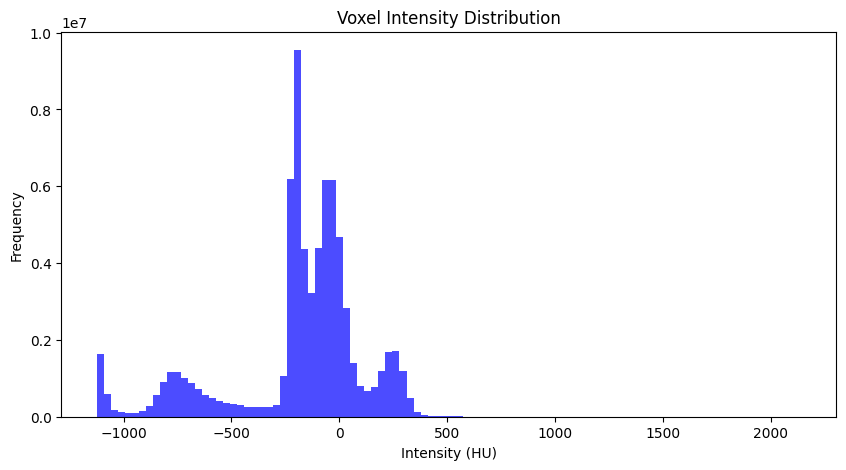

In [11]:
test_ccta_scan, _ = patients[10].get_image_mask_tuple()
test_ccta_scan = shift_mean(test_ccta_scan, mean_voxel_intensity)
flattened_ccta_scan = test_ccta_scan.flatten()

# Plotting the histogram of voxel intensities
plt.figure(figsize=(10, 5))
plt.hist(flattened_ccta_scan, bins=100, color='blue', alpha=0.7)
plt.title("Voxel Intensity Distribution")
plt.xlabel("Intensity (HU)")
plt.ylabel("Frequency")
plt.show()

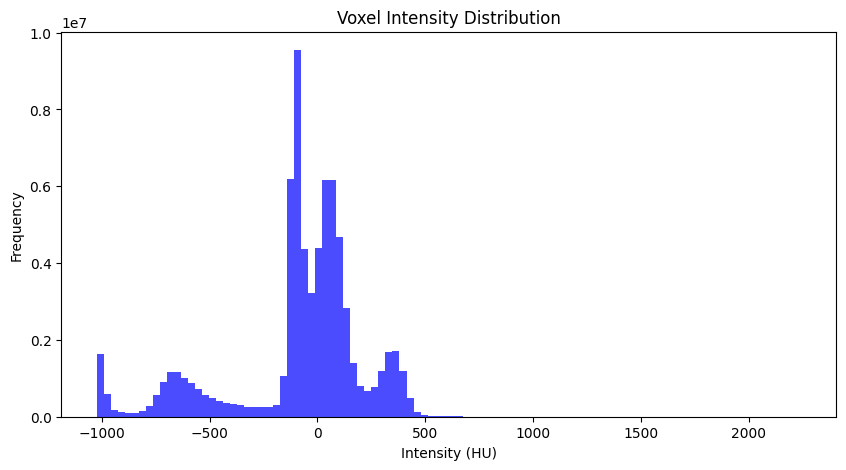

In [12]:
test_ccta_scan, _ = patients[10].get_image_mask_tuple()
flattened_ccta_scan = test_ccta_scan.flatten()

# Plotting the histogram of voxel intensities
plt.figure(figsize=(10, 5))
plt.hist(flattened_ccta_scan, bins=100, color='blue', alpha=0.7)
plt.title("Voxel Intensity Distribution")
plt.xlabel("Intensity (HU)")
plt.ylabel("Frequency")
plt.show()